In [ ]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import math

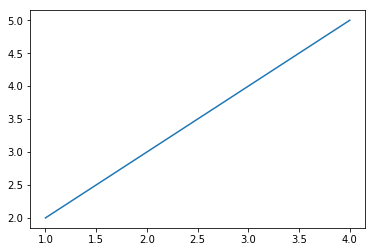

In [4]:
# Plot a simple straight line 
# Fist array is x coordinates, second is y coordinates

plt.plot([1,2,3,4], [2,3,4,5])
plt.show()

In [41]:
# Define blending funcitons from ioflo

def blend0(d = 0.0, u = 1.0, s = 1.0):
    d = float(abs(d))
    u = float(abs(u))
    s = float(abs(s))
    v = d - u #offset by radius

    if v >= s:  #first so if s == 0 catches here so no divide by zero below
        b = 0.0
    elif v <= 0.0:
        b = 1.0
    else: # 0 < v < s
        b = 1.0 - (v / s)
    return b

def blend1(d = 0.0, u = 1.0, s = 1.0):
    v = float(abs(u * s)) #scale uncertainty radius make sure positive
    a = float(abs(d)) #symmetric about origin

    if a >= v or v == 0.0 : #outside uncertainty radius accept delta
        b = 1.0
    elif a < v/2.0: # inside 1/2 uncertainty radius closer to 0
        b = 2.0 * (a * a)/(v * v)
    else: #greater than 1/2 uncertainty radius closer to 1
        b = 1.0 - (2.0 * (a - v) * (a - v))/ (v * v)
        
    return b

def blend2(d = 0.0, u = 1.0, s = 5.0):
    d = float(d)
    u = float(u)
    s = float(abs(s)) # make sure positive

    b = 1.0 - math.exp( - s * (d * d)/(u * u))

    return b

def blend3(d = 0.0, u = 1.0, s = 0.05):
    d = float(d)
    u = float(u)
    s = min(1.0,float(abs(s))) # make sure positive <= 1.0

    b = 1.0 - s ** ((d * d)/(u * u))

    return b

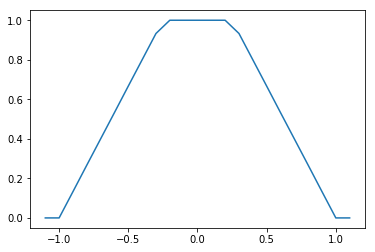

In [45]:
# Plot and display tests results of the blend0() funciton

ss = 0.1
s = .75
u = .25
out = []
for x in range(-11, 12, 1):
    d = x*ss
    b = blend0(d,u,s)
    out.append((round(d,3), round(b,3)))

yCoord = []
xCoord = []

for i in range(len(out)):
    yCoord.append(out[i][0])
    xCoord.append(out[i][1])
plt.plot(yCoord, xCoord)
plt.show()

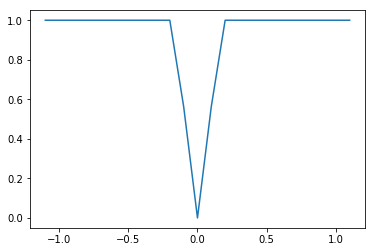

In [49]:
# Plot and display tests results of the blend1() funciton

out = []
for x in range(-11, 12, 1):
    d = x * ss
    b = blend1(d,u,s)
    out.append((round(d, 3), round(b, 3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    yCoord.append(out[i][0])
    xCoord.append(out[i][1])
plt.plot(yCoord, xCoord)
plt.show()

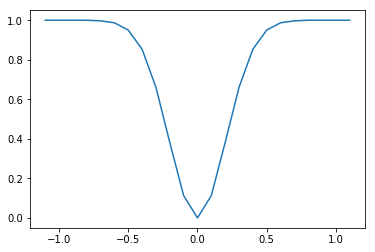

In [50]:
# Plot and display tests results of the blend2() funciton


out = []
for x in range(-11, 12, 1):
    d = x * ss
    b = blend2(d,u,s)
    out.append((round(d, 3), round(b, 3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    yCoord.append(out[i][0])
    xCoord.append(out[i][1])
plt.plot(yCoord, xCoord)
plt.show()

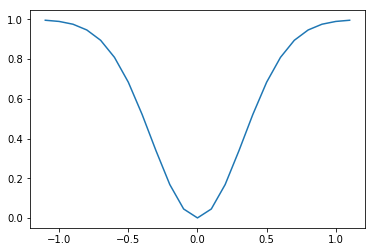

In [51]:
# Plot and display tests results of the blend3() funciton

out = []
for x in range(-11, 12, 1):
    d = x * ss
    b = blend3(d,u,s)
    out.append((round(d, 3), round(b, 3)))
    
yCoord = []
xCoord = []

for i in range(len(out)):
    yCoord.append(out[i][0])
    xCoord.append(out[i][1])
plt.plot(yCoord, xCoord)
plt.show()